# Bounding Box Open Data Example

In [ ]:
import earthkit.data

request = {
    "class": "ai",
    "stream" : "oper",
    "type" : "fc",
    "date" : "20250224",
    "time" : "0000",
    "levtype" : "sfc",
    "expver" : "0102", 
    "model": "aifs-single",
    "domain" : "g",
    "param" : "166/167/169",
    "step" : "0",
    "feature" : {
        "type" : "boundingbox",
        "points" : [[53.55, 2.76], [50.66, 7.86]],
	},
}


ds = earthkit.data.from_source(
    "polytope",
    "ecmwf-mars",
    request,
    stream=False,
    address='polytope.ecmwf.int',
)

## Convert to xarray

In [6]:
da = ds.to_xarray()
da

<xarray.Dataset> Size: 7kB
Dimensions:    (datetimes: 1, number: 1, steps: 1, points: 126)
Coordinates:
  * datetimes  (datetimes) <U20 80B '2025-02-24T00:00:00Z'
  * number     (number) int64 8B 0
  * steps      (steps) int64 8B 0
  * points     (points) int64 1kB 0 1 2 3 4 5 6 ... 119 120 121 122 123 124 125
    x          (points) float64 1kB 50.73 50.73 50.73 ... 53.54 53.54 53.54
    y          (points) float64 1kB 2.917 3.333 3.75 4.167 ... 6.3 6.75 7.2 7.65
    z          (points) float64 1kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Data variables:
    10v        (datetimes, number, steps, points) float64 1kB 6.599 ... 6.1
    2t         (datetimes, number, steps, points) float64 1kB 284.2 ... 283.4
    ssrd       (datetimes, number, steps, points) float64 1kB 0.0 0.0 ... 0.0
Attributes:
    class:          ai
    Forecast date:  2025-02-24T00:00:00Z
    domain:         g
    expver:         0102
    levtype:        sfc
    model:          aifs-single
    step:           0
    stream:         oper
    type:           fc
    number:         0
    date:           2025-02-24T00:00:00Z

## Visualise

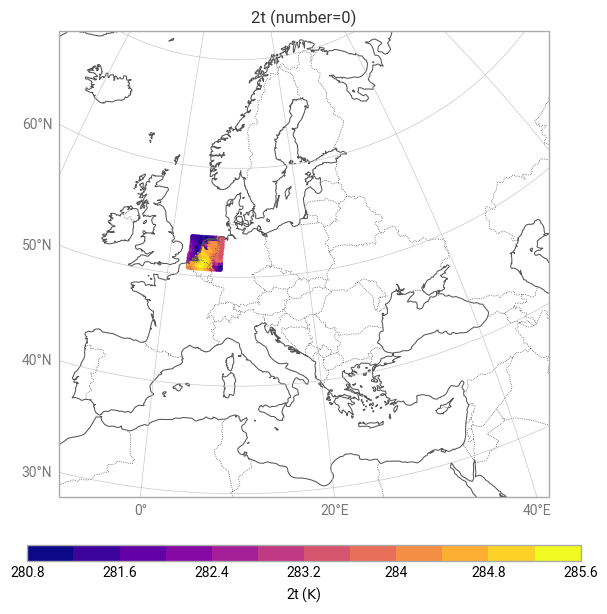

In [7]:
da = ds.to_xarray()
import earthkit.plots
chart = earthkit.plots.Map(domain="Europe")
chart.point_cloud(da['2t'], x="y", y="x")

chart.coastlines()
chart.borders()
chart.gridlines()

chart.title("{variable_name} (number={number})")

chart.legend()

chart.show()